Приблизить исходную ф-цию ф-цией вида $a(x) = w_0 + w_1 \cdot x + w_2 \cdot x^2 + w_3 \cdot x^3$

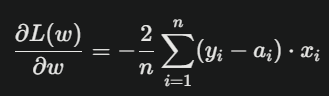

1.   Минимизируем лосс по методу наименьших квадратов
2.   Меняем знак градиента, т.к. алгоритм идет против направления градиента.




In [1]:
import numpy as np

# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return 0.1 * x**2 - np.sin(x) + 5.


def model(x, w):
    return w[0] + w[1] * x + w[2] * x**2 + w[3] * x**3


coord_x = np.arange(-5.0, 5.0, 0.1) # значения по оси абсцисс [-5; 5] с шагом 0.1
coord_y = func(coord_x) # значения функции по оси ординат

sz = len(coord_x)	# количество значений функций (точек)
eta = np.array([0.1, 0.01, 0.001, 0.0001]) # шаг обучения для каждого параметра w0, w1, w2, w3
w = np.array([0., 0., 0., 0.]) # начальные значения параметров модели
N = 200 # число итераций градиентного алгоритма

def compute_gradient(X, y, w, eta):
    n = len(X)
    grad_sum = np.zeros(4)
    for i in range(n):
        xi = np.array([1, X[i], X[i]**2, X[i]**3])
        ai = model(X[i], w)
        error = ai - y[i]
        grad_sum += error * xi
    return (2/n) * grad_sum


for i in range(N):
    gradient = compute_gradient(coord_x, coord_y, w, eta)
    w -= eta * gradient

Q = np.mean((model(coord_x, w) - coord_y)**2)
w

array([ 4.98645739, -0.41780964,  0.10273088,  0.0317247 ])